# Section 4
## PSPNet Semantic Segmentation of SVIs using Deep Learning
**This script is used to segment the urban features present in the SVIs of the points of interests. Through this segmentation, we can acquire the information about the percentage of different urban features such as building, enclosure, openness, greenary etc and distribution of them in the streetscape. This dataset will be important to corelate with the areas which are more integrated and less integrated (based on space syntax analysis, not covered in this project) for measuring the road preferences and impact of different elements on that preferences. We'll use the SVIs downloaded from Google API in section B**

**Workflow:**
- Import the color pallete for different streetscape features
- Read the downloaded SVIs
- Apply PSPNET to SVI for Image Segmentation and generate a CSV
- Read and clean the csv result

## Step 01_Import the Color Pallete for different street features

**Import color labels for the pictures and import packages**

In [1]:
### 1.Import Color Pallete
from collections import namedtuple
import scipy.io
import time
Label = namedtuple('Label', ['name','id','color'])
labels_ade = [Label('wall', 0, (120, 120, 120)),
        Label('building', 1, (180, 120, 120)),
        Label('sky', 2, (6, 230, 230)),
        Label('floor', 3, (80, 50, 50)),
        Label('tree', 4, (4, 200, 3)),
        Label('ceiling', 5, (120, 120, 80)),
        Label('road', 6, (140, 140, 140)),
        Label('bed', 7, (204, 5, 255)),
        Label('windowpane', 8, (230, 230, 230)),
        Label('grass', 9, (4, 250, 7)),
        Label('cabinet', 10, (224, 5, 255)),
        Label('sidewalk', 11, (235, 255, 7)),
        Label('person', 12, (150, 5, 61)),
        Label('earth', 13, (120, 120, 70)),
        Label('door', 14, (8, 255, 51)),
        Label('table', 15, (255, 6, 82)),
        Label('mountain', 16, (143, 255, 140)),
        Label('plant', 17, (204, 255, 4)),
        Label('curtain', 18, (255, 51, 7)),
        Label('chair', 19, (204, 70, 3)),
        Label('car', 20, (0, 102, 200)),
        Label('water', 21, (61, 230, 250)),
        Label('painting', 22, (255, 6, 51)),
        Label('sofa', 23, (11, 102, 255)),
        Label('shelf', 24, (255, 7, 71)),
        Label('house', 25, (255, 9, 224)),
        Label('sea', 26, (9, 7, 230)),
        Label('mirror', 27, (220, 220, 220)),
        Label('rug', 28, (255, 9, 92)),
        Label('field', 29, (112, 9, 255)),
        Label('armchair', 30, (8, 255, 214)),
        Label('seat', 31, (7, 255, 224)),
        Label('fence', 32, (255, 184, 6)),
        Label('desk', 33, (10, 255, 71)),
        Label('rock', 34, (255, 41, 10)),
        Label('wardrobe', 35, (7, 255, 255)),
        Label('lamp', 36, (224, 255, 8)),
        Label('bathtub', 37, (102, 8, 255)),
        Label('railing', 38, (255, 61, 6)),
        Label('cushion', 39, (255, 194, 7)),
        Label('base', 40, (255, 122, 8)),
        Label('box', 41, (0, 255, 20)),
        Label('column', 42, (255, 8, 41)),
        Label('signboard', 43, (255, 5, 153)),
        Label('chest of drawers', 44, (6, 51, 255)),
        Label('counter', 45, (235, 12, 255)),
        Label('sand', 46, (160, 150, 20)),
        Label('sink', 47, (0, 163, 255)),
        Label('skyscraper', 48, (140, 140, 140)),
        Label('fireplace', 49, (250, 10, 15)),
        Label('refrigerator', 50, (20, 255, 0)),
        Label('grandstand', 51, (31, 255, 0)),
        Label('path', 52, (255, 31, 0)),
        Label('stairs', 53, (255, 224, 0)),
        Label('runway', 54, (153, 255, 0)),
        Label('case', 55, (0, 0, 255)),
        Label('pool table', 56, (255, 71, 0)),
        Label('pillow', 57, (0, 235, 255)),
        Label('screen door', 58, (0, 173, 255)),
        Label('stairway', 59, (31, 0, 255)),
        Label('river', 60, (11, 200, 200)),
        Label('bridge', 61, (255, 82, 0)),
        Label('bookcase', 62, (0, 255, 245)),
        Label('blind', 63, (0, 61, 255)),
        Label('coffee table', 64, (0, 255, 112)),
        Label('toilet', 65, (0, 255, 133)),
        Label('flower', 66, (255, 0, 0)),
        Label('book', 67, (255, 163, 0)),
        Label('hill', 68, (255, 102, 0)),
        Label('bench', 69, (194, 255, 0)),
        Label('countertop', 70, (0, 143, 255)),
        Label('stove', 71, (51, 255, 0)),
        Label('palm', 72, (0, 82, 255)),
        Label('kitchen island', 73, (0, 255, 41)),
        Label('computer', 74, (0, 255, 173)),
        Label('swivel chair', 75, (10, 0, 255)),
        Label('boat', 76, (173, 255, 0)),
        Label('bar', 77, (0, 255, 153)),
        Label('arcade machine', 78, (255, 92, 0)),
        Label('hovel', 79, (255, 0, 255)),
        Label('bus', 80, (255, 0, 245)),
        Label('towel', 81, (255, 0, 102)),
        Label('light', 82, (255, 173, 0)),
        Label('truck', 83, (255, 0, 20)),
        Label('tower', 84, (255, 184, 184)),
        Label('chandelier', 85, (0, 31, 255)),
        Label('awning', 86, (0, 255, 61)),
        Label('streetlight', 87, (0, 71, 255)),
        Label('booth', 88, (255, 0, 204)),
        Label('television receiver', 89, (0, 255, 194)),
        Label('airplane', 90, (0, 255, 82)),
        Label('dirt track', 91, (0, 10, 255)),
        Label('apparel', 92, (0, 112, 255)),
        Label('pole', 93, (51, 0, 255)),
        Label('land', 94, (0, 194, 255)),
        Label('bannister', 95, (0, 122, 255)),
        Label('escalator', 96, (0, 255, 163)),
        Label('ottoman', 97, (255, 153, 0)),
        Label('bottle', 98, (0, 255, 10)),
        Label('buffet', 99, (255, 112, 0)),
        Label('poster', 100, (143, 255, 0)),
        Label('stage', 101, (82, 0, 255)),
        Label('van', 102, (163, 255, 0)),
        Label('ship', 103, (255, 235, 0)),
        Label('fountain', 104, (8, 184, 170)),
        Label('conveyer belt', 105, (133, 0, 255)),
        Label('canopy', 106, (0, 255, 92)),
        Label('washer', 107, (184, 0, 255)),
        Label('plaything', 108, (255, 0, 31)),
        Label('swimming pool', 109, (0, 184, 255)),
        Label('stool', 110, (0, 214, 255)),
        Label('barrel', 111, (255, 0, 112)),
        Label('basket', 112, (92, 255, 0)),
        Label('waterfall', 113, (0, 224, 255)),
        Label('tent', 114, (112, 224, 255)),
        Label('bag', 115, (70, 184, 160)),
        Label('minibike', 116, (163, 0, 255)),
        Label('cradle', 117, (153, 0, 255)),
        Label('oven', 118, (71, 255, 0)),
        Label('ball', 119, (255, 0, 163)),
        Label('food', 120, (255, 204, 0)),
        Label('step', 121, (255, 0, 143)),
        Label('tank', 122, (0, 255, 235)),
        Label('trade name', 123, (133, 255, 0)),
        Label('microwave', 124, (255, 0, 235)),
        Label('pot', 125, (245, 0, 255)),
        Label('animal', 126, (255, 0, 122)),
        Label('bicycle', 127, (255, 245, 0)),
        Label('lake', 128, (10, 190, 212)),
        Label('dishwasher', 129, (214, 255, 0)),
        Label('screen', 130, (0, 204, 255)),
        Label('blanket', 131, (20, 0, 255)),
        Label('sculpture', 132, (255, 255, 0)),
        Label('hood', 133, (0, 153, 255)),
        Label('sconce', 134, (0, 41, 255)),
        Label('vase', 135, (0, 255, 204)),
        Label('traffic light', 136, (41, 0, 255)),
        Label('tray', 137, (41, 255, 0)),
        Label('ashcan', 138, (173, 0, 255)),
        Label('fan', 139, (0, 245, 255)),
        Label('pier', 140, (71, 0, 255)),
        Label('crt screen', 141, (122, 0, 255)),
        Label('plate', 142, (0, 255, 184)),
        Label('monitor', 143, (0, 92, 255)),
        Label('bulletin board', 144, (184, 255, 0)),
        Label('shower', 145, (0, 133, 255)),
        Label('radiator', 146, (255, 214, 0)),
        Label('glass', 147, (25, 194, 194)),
        Label('clock', 148, (102, 255, 0)),
        Label('flag', 149, (92, 0, 255))]

labels_citys = [
    #     name id trainId  category catId  hasInstances ignoreInEval  color
    Label('unlabeled',  0,  (0,  0,  0)),
    Label('ego vehicle',  1,    (0,  0,  0)),
    Label('rectification border',  2,   (0,  0,  0)),
    Label('out of roi',  3,     (0,  0,  0)),
    Label('static',  4,     (0,  0,  0)),
    Label('dynamic',  5,    (111, 74,  0)),
    Label('ground',  6,     (81,  0, 81)),
    Label('road',  7,       (128, 64, 128)),
    Label('sidewalk',  8,   (244, 35, 232)),
    Label('parking',  9,      (250, 170, 160)),
    Label('rail track', 10,      (230, 150, 140)),
    Label('building', 11,        (70, 70, 70)),
    Label('wall', 12,        (102, 102, 156)),
    Label('fence', 13,        (190, 153, 153)),
    Label('guard rail', 14,      (180, 165, 180)),
    Label('bridge', 15,      (150, 100, 100)),
    Label('tunnel', 16,      (150, 120, 90)),
    Label('pole', 17,        (153, 153, 153)),
    Label('polegroup', 18,      (153, 153, 153)),
    Label('traffic light', 19,        (250, 170, 30)),
    Label('traffic sign', 20,        (220, 220,  0)),
    Label('vegetation', 21,        (107, 142, 35)),
    Label('terrain', 22,    (152, 251, 152)),
    Label('sky', 23,(70, 130, 180)),
    Label('person', 24,(220, 20, 60)),
    Label('rider', 25,(255,  0,  0)),
    Label('car', 26,(0,  0, 142)),
    Label('truck', 27,(0,  0, 70)),
    Label('bus', 28, (0, 60, 100)),
    Label('caravan', 29,(0,  0, 90)),
    Label('trailer', 30,(0,  0, 110)),
    Label('train', 31, (0, 80, 100)),
    Label('motorcycle', 32,(0,  0, 230)),
    Label('bicycle', 33, (119, 11, 32)),
    Label('license plate', -1, (0,  0, 142)),
]

ade20k_id2label = {label.id: label for label in labels_ade}
citys_id2label = {label.id: label for label in labels_citys}

## Step 02_Read the downloaded SVIs

**Import 'os', 'mxnet', 'os.path' and 'pandas' packages. Importing 'mxnet' should not be a problem. However, sometimes it creates issues with importing after installing. More information is provided in https://mxnet.apache.org/versions/1.0.0/install/windows_setup.html. I converted my scripts to run in CPU based computer from Google colab to segment the pictures, so that others can use the script. I went through a lot of trial and error process to activate in my computer. Therefore, there is a chance that the computer prerequisite can be more. Best way is to use GPU based computer or Google Colab to use PSPNet analysis to reduce the computation time tremendously. Here, we'll show segmenting only 3 pictures. I have uplaoded the all the segmented clr and labeled images in 'pspnet_clr' and 'pspnet_labeled' folders in 'OutputFiles_AllResults' folder.**

**Check if the files from folder 'DownloadedSVIs' generated in section C can be read**

In [2]:
### 2.Generate jpg list
from os import listdir
from mxnet import image
from os.path import isfile, join
import pandas as pd

path="OutputFiles/DownloadedSVIs/"
print("Photo path is: %s"%(path))
all_files = [f for f in listdir(path)]
### Get only text files
jpg_files = list(filter(lambda x: x[-5:] == ('.jpeg') or x[-4:] == ('.jpg'), all_files))
jpg_files.sort()
print(jpg_files) 
print("1.Image Files in the folder:",len(jpg_files))

Photo path is: OutputFiles/DownloadedSVIs/
['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
1.Image Files in the folder: 20


**Import the 'os', 'arcpy', and 'arcpy.env' modules.**

In [3]:
## Task 1:  Develop your code for Task 1 here.

#import os module
import os

#import arcpy module
import arcpy

#import arcpy.env module
from arcpy import env


**Set the base directory location.**

In [4]:
## Configure Base Directory Location.
import sys, os, zipfile, string, math, numpy
import pandas

#get path to the lab
BaseDirectory = os.getcwd()

if not os.path.exists(BaseDirectory):
    print ("File path is invalid")
else:
    print("Input working directory exists!")
    print()
    print(BaseDirectory)

Input working directory exists!

D:\MIZZOU\_GIS_II\Lab\LabFiles\AmanGISNotebooks\FinalProject\FinalFiles


**Create two folders for storing the segmented pictures. One folder is for clear segmented pictures without having any labeling, and another folder is for pictures with the labeling**

In [5]:
# check if folder 'pspnet_clr' exists. This folder will be needed to store the segemented pictures
if (arcpy.Exists(os.path.join(BaseDirectory,"OutputFiles","pspnet_clr"))):
    # if so, delete it
    arcpy.management.Delete(os.path.join(BaseDirectory,"OutputFiles","pspnet_clr"))

OutPath = os.path.join(BaseDirectory, "OutputFiles")
    
# create a new folder named 'pspnet_clr'
arcpy.CreateFolder_management(OutPath,"pspnet_clr")


# check if folder 'pspnet_labeled' exists. This folder will be needed to store the segemented pictures withe labeling
if (arcpy.Exists(os.path.join(BaseDirectory,"OutputFiles","pspnet_labeled"))):
    # if so, delete it
    arcpy.management.Delete(os.path.join(BaseDirectory,"OutputFiles","pspnet_labeled"))

# create a new folder named 'pspnet_labeled'
arcpy.CreateFolder_management(OutPath,"pspnet_labeled")


<Result 'D:\\MIZZOU\\_GIS_II\\Lab\\LabFiles\\AmanGISNotebooks\\FinalProject\\FinalFiles\\OutputFiles\\pspnet_labeled'>

**Set the current workspace environment to your 'OutputFiles' folder.**

In [6]:
## Set the workspace to your xls file generated from Section B
env.workspace = OutPath
 
## Configure the environment to permit overwriting of data
arcpy.env.overwriteOutput = True

**Test whether the images can be called from the folder, and the format of the picture**

In [7]:
# Get image
for filename in jpg_files[1:2]:
    print((filename.split('.')[0]))
    ### 1.Read the jpg file
    img = image.imread(path+filename)
    print(filename,'image shape:',img.shape)

1
1.jpg image shape: (400, 640, 3)


**This is another way to create folder and if exists, delete and replace the folders to store the pictures. As we are using the previous code block to conduct this task, I have commented the codeblock out**

In [8]:
# Another way to create the folders and delete if exists

# import os
# import shutil


# dirpath = os.path.join("OutputFiles/pspnet_labeled")
# if os.path.exists(dirpath):
#     shutil.rmtree(dirpath)
    
# dirpath2 = os.path.join("OutputFiles/pspnet_clr")
# if os.path.exists(dirpath2):
#     shutil.rmtree(dirpath2)

# os.mkdir("OutputFiles/pspnet_clr")
# os.mkdir("OutputFiles/pspnet_labeled")




**Define the segmentation picture paths to the created folders**

In [9]:
# Define two folders to store the segmented pictures (one for segmented pictures, one for labeled segmented pictures)
path_out= "OutputFiles/pspnet_clr/"
path_out_lgd= "OutputFiles/pspnet_labeled/"

## Step 03_Apply PSPNET to SVI for Image Segmentation and generate a CSV

**Import several packages for PSPNet execution. Also, define the labeling for the segmentation**

In [10]:
### 3.Apply PSPNET to images and generate a csv
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches 
from matplotlib.font_manager import FontProperties
import numpy as np
import collections
from gluoncv.utils.viz import get_color_pallete

keywords=['mountain','water','lake','sky','bridge','pier',
          'ceiling','building','skyscraper','wall','fence','windowpane','glass',
          'tree','grass','plant','road','sidewalk','earth',
          'person','minibike','bicycle','car','van',
          'sofa','chair','booth','fountain','railing','signboard','column','awning','desk','lamp',
          'streetlight','sculpture','ashcan','bulletin board']



**For using single cpu, you can define your cpu as 0. First, you have to Read the jpg files from the folder. Then, normalize the image using dataset mean for deep learning method. In the next step, apply pre-trained model to the loaded image. Then, add the color pallete for visualization. Finally, save the previction outcome pictures in the defined folders.**

**As you'll use cpu to execute this code block, it will take a considerate computation time. Therefore, You can break the process after executing defined outcomes. Here, we broke the operation after 3 iterations (ID).**

**Finally, the csv dataset having the segmented ratio information of each urban features need to be stored in 'OutputFiles' folder.**

In [11]:
#1. Using cpu
ctx = mx.cpu(0)


df_pspnet=pd.DataFrame()
# Get pre-trained model | PSPNET Cityscape
model = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True)
# Set up legend font
fontP = FontProperties()
fontP.set_size('x-small') 

ID=0
for filename in jpg_files[0:]:
    
    t1 = time.time()
    ### 1.Read the jpg file
    img = image.imread(path+filename)
    #print(path+filename,img.shape)
    size=img.shape[0]*img.shape[1]
#     # Display origin image
#     plt.imshow(img.asnumpy())
#     plt.show()    
    ### 2.Normalize the image using dataset mean
    transform_fn = transforms.Compose([
                   transforms.ToTensor(),
                   transforms.Normalize([.485, .456, .406], [.229, .224, .225])
    ])
    img = transform_fn(img)
    img = img.expand_dims(0).as_in_context(ctx)

    
    ### 3. Apply pre-trained model to the loaded image
    output = model.demo(img)
    ### 4.Make prediction using single scale
    predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
    ### 5.Add color pallete for visualization
    mask = get_color_pallete(predict, 'ade20k')
    # 6 Save prediction outcome
    fileID=(filename.split('.')[0]).split('_')[0]
    print('***Read file:%s, with FileID:%s'%(filename,fileID))
    mask.save(path_out+fileID+'.png')

    
    plt.imshow(mask)

    unique, counts = np.unique(predict, return_counts=True)
    ratio_dict=dict(zip(unique, counts))
    labelratio_dict={}
    legend_dict={}
    ### 7 Get Ratio
    for key in ratio_dict.keys():
            legend_dict[ade20k_id2label[key][0]]=np.round(np.interp(ade20k_id2label[key][2], (0, 255), (0, 1)),6)
            labelratio_dict[ade20k_id2label[key][0]]=round(ratio_dict[key]/size,6)

    # 8 Add Legend
    patchList = []
    for key in legend_dict:
            data_key = mpatches.Patch(color=legend_dict[key], label=key)
            patchList.append(data_key)
    plt.legend(handles=patchList,loc='best',fontsize='x-small',prop=fontP,labelspacing=0.2)
    plt.savefig(path_out_lgd+fileID+'.png', bbox_inches='tight')
    plt.close()
    # Display masked image with legend
    #plt.show()
    #print (labelratio_dict)        
    df_pspnet.loc[ID,'FID']=fileID
    for key in labelratio_dict.keys():
        if key in keywords:
            df_pspnet.loc[ID,key]=labelratio_dict[key]    
    ID+=1
    t2 = time.time()
    print('runtime',t2-t1)
    df_pspnet.to_csv('OutputFiles/pspnet_result.csv', index=False, encoding='utf-8')

    
#### Break the operation after executing 3 PSPNet segmentation

    #Break after reading 3 pictures
    if (ID >= 3):
        break
        

# Save the segmentation result to a csv in the folder
df_pspnet.to_csv('OutputFiles/pspnet_result.csv', index=False, encoding='utf-8')
print("All Done")
df_pspnet.head(3)

self.crop_size 480
***Read file:0.jpg, with FileID:0
runtime 8.241772174835205
***Read file:1.jpg, with FileID:1
runtime 7.720020055770874
***Read file:10.jpg, with FileID:10
runtime 8.8559250831604
All Done


FID  building       sky      tree      road     grass  sidewalk     earth  \
0   0  0.191863  0.150297  0.220465  0.007754  0.173000  0.176742  0.009547   
1   1  0.199891  0.271680  0.035777  0.318438  0.040871  0.071062  0.002445   
2  10  0.266512  0.164156  0.151234  0.217656  0.061539  0.095781  0.033461   

      plant       car  streetlight    column  signboard  minibike  
0  0.032359  0.034359     0.000012       NaN        NaN       NaN  
1  0.019762  0.013020     0.001648  0.000094   0.001375  0.000301  
2       NaN  0.005633          NaN  0.000863        NaN       NaN

## Step 4_Read and clean the csv result

**Notice that there are many NaN, which means that no data, we will replace these NaN with 0**

**Read the csv result**

In [12]:
#Read the csv result
df_psp=pd.read_csv('OutputFiles/pspnet_result.csv', encoding='utf-8', engine='python')
df_psp.head(3)

FID  building       sky      tree      road     grass  sidewalk     earth  \
0    0  0.191863  0.150297  0.220465  0.007754  0.173000  0.176742  0.009547   
1    1  0.199891  0.271680  0.035777  0.318438  0.040871  0.071062  0.002445   
2   10  0.266512  0.164156  0.151234  0.217656  0.061539  0.095781  0.033461   

      plant       car  streetlight    column  signboard  minibike  
0  0.032359  0.034359     0.000012       NaN        NaN       NaN  
1  0.019762  0.013020     0.001648  0.000094   0.001375  0.000301  
2       NaN  0.005633          NaN  0.000863        NaN       NaN

**Replace the NAN values with 0 and export the csv result**

In [13]:
#Replace the NaN with 0 using fillna(0), and save the result to a new csv file
df_psp=df_psp.fillna(0)

# save the result to a new csv file
df_psp.to_csv('OutputFiles/pspnet_final.csv', index=False, encoding='utf-8')

df_psp.head(3)

FID  building       sky      tree      road     grass  sidewalk     earth  \
0    0  0.191863  0.150297  0.220465  0.007754  0.173000  0.176742  0.009547   
1    1  0.199891  0.271680  0.035777  0.318438  0.040871  0.071062  0.002445   
2   10  0.266512  0.164156  0.151234  0.217656  0.061539  0.095781  0.033461   

      plant       car  streetlight    column  signboard  minibike  
0  0.032359  0.034359     0.000012  0.000000   0.000000  0.000000  
1  0.019762  0.013020     0.001648  0.000094   0.001375  0.000301  
2  0.000000  0.005633     0.000000  0.000863   0.000000  0.000000

**Two folders named  'pspnet_clr' and 'pspnet_labeled' are uploaded in the 'OutputFiles_AllResults' folder, where I put all the pictures. For minimizing the time consumption of rendering, we gave the iteration of 3 pictures. Pictures are stored in 'pspnet_clr' and 'pspnet_labeled' folders in 'OutputFiles' folder. Moreover, you'll find a csv dataset there. Combined GIF of the overall 481 PSPNet segmentation results are given below.**

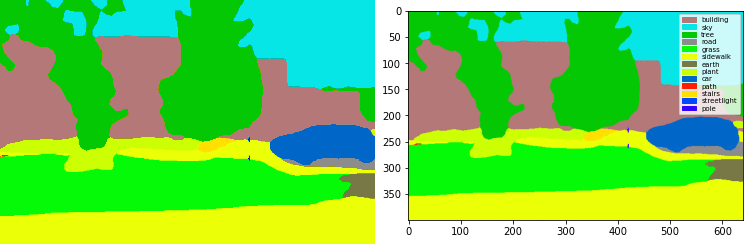

# SAVE YOUR NOTEBOOK, then `File > Close and Halt`

Template copyright_ Dr. Matisziw 2019